In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint

In [75]:
def rotation_matrix(theta):
    theta = np.radians(-theta)
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c, -s), (s, c)))

In [76]:
def show(x, xy_limit):
    df = pd.DataFrame(x, columns=["x", "y"])
    sns.set_style('darkgrid')
    plot = sns.jointplot(data=df, x="x", y="y")
    plot.ax_marg_x.set_xlim(-xy_limit[0], xy_limit[1])
    plot.ax_marg_y.set_ylim(-xy_limit[0], xy_limit[1])
    #pprint(dir(plot.fig))

In [77]:
X = np.random.normal(0., 1., size=(1000, 2))

In [78]:
X

array([[ 0.48879397, -1.3956725 ],
       [-1.91107305, -0.67704694],
       [ 0.27197821, -1.18711804],
       ...,
       [-0.22416136,  0.31708691],
       [-0.28234636, -0.57540768],
       [ 0.72936363, -1.0716809 ]])

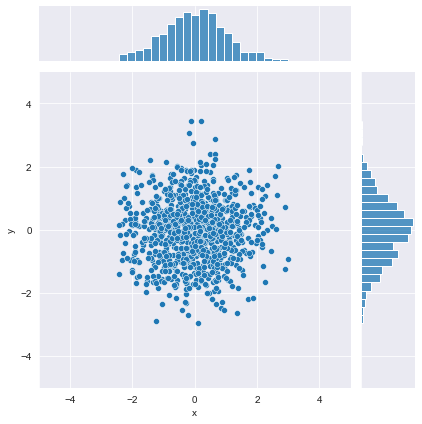

In [79]:
show(X, (5, 5))

In [80]:
D = np.array([[5, 0], [0, 0.5]])

In [81]:
X = X.dot(D)

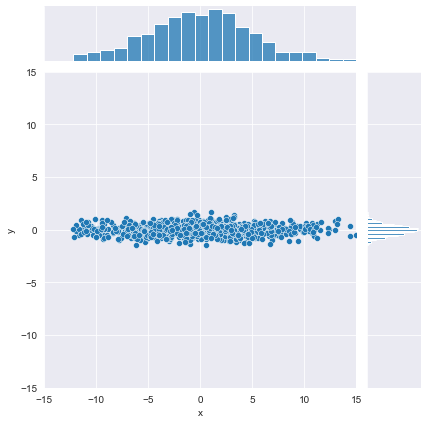

In [82]:
show(X, (15, 15))

In [83]:
V = rotation_matrix(30)

In [84]:
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [85]:
X = X.dot(V)

In [86]:
X

array([[ 2.46545811,  0.61764101],
       [-8.1059273 , -5.07085254],
       [ 1.47447969,  0.16590833],
       ...,
       [-1.04991887, -0.42310073],
       [-1.07874367, -0.95502473],
       [ 3.42615738,  1.35935763]])

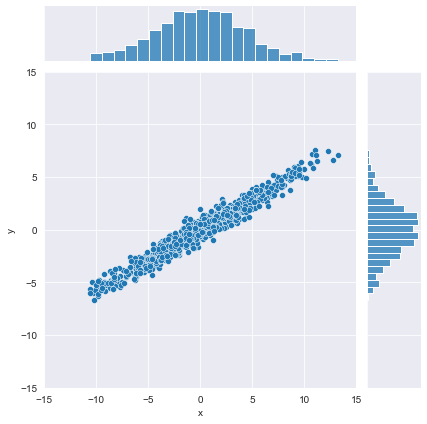

In [87]:
show(X, (15, 15))

In [88]:
u, s, vh = np.linalg.svd(X, full_matrices=False)

In [89]:
u

array([[-0.01545433, -0.04568167],
       [ 0.06044419, -0.02139269],
       [-0.00859779, -0.0388041 ],
       ...,
       [ 0.00708849,  0.01041897],
       [ 0.00893181, -0.01866071],
       [-0.023064  , -0.03520364]])

In [90]:
s

array([158.09180184,  15.33469589])

In [91]:
vh

array([[-0.86547687, -0.50094888],
       [-0.50094888,  0.86547687]])

In [92]:
X_hat = (u.dot(np.diag(s))).dot(vh)

In [93]:
X_hat, X_hat.shape

(array([[ 2.46545811,  0.61764101],
        [-8.1059273 , -5.07085254],
        [ 1.47447969,  0.16590833],
        ...,
        [-1.04991887, -0.42310073],
        [-1.07874367, -0.95502473],
        [ 3.42615738,  1.35935763]]),
 (1000, 2))

In [94]:
s[1] = 0

In [95]:
X_hat = (u.dot(np.diag(s))).dot(vh)

In [96]:
X_hat, X_hat.shape

(array([[ 2.11453618,  1.22392008],
        [-8.27026379, -4.78693249],
        [ 1.1763905 ,  0.68090959],
        ...,
        [-0.96988137, -0.56137951],
        [-1.22209339, -0.70736299],
        [ 3.15572658,  1.82657416]]),
 (1000, 2))

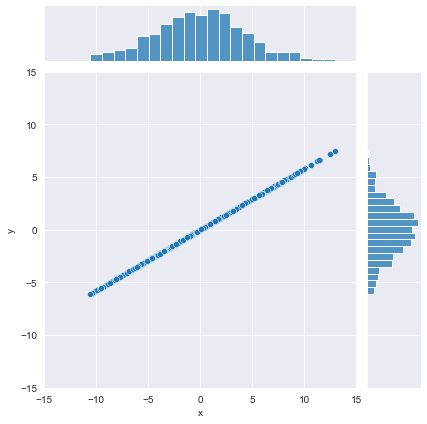

In [97]:
show(X_hat, (15, 15))